# Tutorial 6

In today's tutorial we will discuss the Kaggle competiton uploaded by Miss. Please note that in this tutorial we will only cover the basics of how to process the data and upload the solutions so there are multiple ways to attempt the problem. Please do not copy the code of the tutorial as it will be marked as plagiarised. This is only to show you the process. I have marked down the steps so that you can easily follow the guidelines to attempt the problem.

### Step 1 Importing Libraries

In [1]:
import pandas as pd
import random as random
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

### Step 2 Storing data in Data Frame

In [2]:
data = pd.read_csv("train.csv")

In [3]:
pd.set_option('display.max_columns', None) #to show all the columns
data.head()

,RecordID,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribe
0,13783,49,admin.,divorced,professional.course,no,yes,yes,cellular,aug,mon,4457,1,115,2,failure,1.4,92.479703,-35.498996,0.705058,4990.198481,no
1,23986,52,services,married,high.school,unknown,yes,no,cellular,may,mon,4797,1,402,2,nonexistent,-1.8,93.439161,-39.331320,4.245479,5144.563621,yes
2,20663,46,blue-collar,divorced,basic.9y,no,no,no,cellular,apr,wed,169,1,999,1,failure,-1.8,93.075000,-47.100000,1.445000,5099.100000,no
3,13958,26,entrepreneur,single,high.school,yes,yes,yes,cellular,aug,fri,376,28,999,0,nonexistent,1.4,93.444000,-36.100000,4.967000,5228.100000,yes
4,28184,47,admin.,single,university.degree,no,no,no,cellular,nov,tue,3033,1,252,4,success,-3.4,94.352376,-33.073620,1.208702,5025.420036,no


In [4]:
data.describe()

,RecordID,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000
mean,15011.876889,40.904489,1146.554311,3.857244,774.562533,1.316444,0.078529,93.538746,-39.872633,3.307811,5138.567351
std,8679.392766,12.026945,1430.790448,7.210891,326.020060,1.918733,1.573831,0.647698,5.692010,1.608627,81.748896
min,1.000000,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,7483.750000,32.000000,144.000000,1.000000,558.750000,0.000000,-1.800000,92.969840,-43.643788,1.410000,5081.293851
50%,15032.500000,38.000000,354.000000,2.000000,999.000000,0.000000,1.100000,93.485726,-41.522404,3.964364,5165.319989
75%,22514.500000,48.000000,1877.000000,3.000000,999.000000,2.000000,1.400000,93.994000,-36.100000,4.864000,5218.069326
max,30000.000000,98.000000,4918.000000,56.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [5]:
data.shape

(22500, 22)

### 3 Correcting data types 

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22500 entries, 0 to 22499
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RecordID        22500 non-null  int64  
 1   age             22500 non-null  int64  
 2   job             22500 non-null  object 
 3   marital         22500 non-null  object 
 4   education       22500 non-null  object 
 5   default         22500 non-null  object 
 6   housing         22500 non-null  object 
 7   loan            22500 non-null  object 
 8   contact         22500 non-null  object 
 9   month           22500 non-null  object 
 10  day_of_week     22500 non-null  object 
 11  duration        22500 non-null  int64  
 12  campaign        22500 non-null  int64  
 13  pdays           22500 non-null  int64  
 14  previous        22500 non-null  int64  
 15  poutcome        22500 non-null  object 
 16  emp.var.rate    22500 non-null  float64
 17  cons.price.idx  22500 non-null 

- DataFrame.astype() method is used to cast a pandas object to a specified dtype. astype() function also provides the capability to convert any suitable existing column to categorical type.

- DataFrame.astype() function comes very handy when we want to case a particular column data type to another data type.

In [7]:
#check the data types and notice that many of the data types should be categorical.
#converting job,martial education,contact,month,day,poutcome,default,housing and loan
attribute_list = ["job","marital","education","contact","month","day_of_week","poutcome","default","housing","loan"]
for i in attribute_list:
    data[i] = data[i].astype("category")

In [8]:
data.dtypes

RecordID             int64
age                  int64
job               category
marital           category
education         category
default           category
housing           category
loan              category
contact           category
month             category
day_of_week       category
duration             int64
campaign             int64
pdays                int64
previous             int64
poutcome          category
emp.var.rate       float64
cons.price.idx     float64
cons.conf.idx      float64
euribor3m          float64
nr.employed        float64
subscribe           object
dtype: object

Similarly we make sure all the data types are correctly defined so that we can acess data frame methods. Rest is left for you to do it.

In [9]:
# Categorical encoding and storing in same column
for i in attribute_list:
    data[i] = data[i].cat.codes

In [10]:
data.marital

0        0
1        1
2        0
3        2
4        2
        ..
22495    1
22496    0
22497    1
22498    1
22499    1
Name: marital, Length: 22500, dtype: int8

In [11]:
data.dtypes

RecordID            int64
age                 int64
job                  int8
marital              int8
education            int8
default              int8
housing              int8
loan                 int8
contact              int8
month                int8
day_of_week          int8
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome             int8
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
subscribe          object
dtype: object

In [12]:
data.head()

,RecordID,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribe
0,13783,49,0,0,5,0,2,2,0,1,1,4457,1,115,2,0,1.4,92.479703,-35.498996,0.705058,4990.198481,no
1,23986,52,7,1,3,1,2,0,0,6,1,4797,1,402,2,1,-1.8,93.439161,-39.331320,4.245479,5144.563621,yes
2,20663,46,1,0,2,0,0,0,0,0,4,169,1,999,1,0,-1.8,93.075000,-47.100000,1.445000,5099.100000,no
3,13958,26,2,2,3,2,2,2,0,1,0,376,28,999,0,1,1.4,93.444000,-36.100000,4.967000,5228.100000,yes
4,28184,47,0,2,6,0,0,0,0,7,3,3033,1,252,4,2,-3.4,94.352376,-33.073620,1.208702,5025.420036,no


- Tip for high scores : I am not handling the unknown value in samples and have assigned the category to them. But you should treat them seperatly because it is unknown. See Tutorial 5 that how I replaced with mean of the variable. There are other techniques too to handle this issue.
- Another issue is that using the categorical encoding number is that they introduce relation/comparison between samples. Apparently, there is no relation between various job type, but when looking at the number, one might think that ‘blue collar’   has higher precedence over unemployed in job type. The algorithm might misunderstand that data has some kind of hierarchy/order 0 < 1 < 2 … < 6 and might give 5X more weight to ‘blue collar’ in calculation then than ‘unemplyed’ bridge type.

### 4 Exploratory Analysis (Missing values,Outlier Analysis data visualization to explore data and relationships) 

See tutorial 3 and 4 for these steps and identify patterns in data. Find correaltions and see if particular column is important or not. Make as many plots as possible to gain insights from data.

### 5 Modelling 

In [13]:
# I will only use Decision tress as model but you should other models to get better scores.
#fix the randomness
random.seed(123)
#seperate dependent and independent attributes
Independent = data.drop("subscribe",axis =1)
Dependent   = data["subscribe"]
#Split the data in train(70%) and test(30%)
X_train, X_test, y_train, y_test = train_test_split(Independent, Dependent, test_size=0.30,random_state = 42)

In [14]:
X_train

,RecordID,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
17730,11993,58,5,1,0,1,2,0,0,3,4,374,1,999,0,1,1.4,93.918000,-42.700000,4.963000,5228.100000
18784,17648,38,9,2,5,0,2,0,0,7,1,3256,1,548,2,2,-0.1,93.701169,-34.973164,1.485195,5130.420952
16809,23634,33,1,1,2,0,0,0,0,6,0,728,1,999,0,1,-1.8,92.893000,-46.200000,1.313000,5099.100000
20793,26135,58,5,1,2,0,0,2,0,6,0,256,2,638,5,0,-1.8,92.881978,-44.850074,0.636905,4984.510801
13114,11679,26,1,2,2,0,2,0,0,3,3,56,3,999,0,1,1.4,93.918000,-42.700000,4.961000,5228.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,7677,25,9,1,3,0,0,0,1,4,3,1387,5,299,3,2,1.4,93.986468,-38.614807,4.788595,5176.217107
21575,24356,85,10,2,1,2,0,2,0,2,0,3446,49,477,5,0,-1.8,94.056818,-28.772417,1.471116,5192.659492
5390,19114,71,10,1,6,0,0,0,1,8,3,308,54,999,0,1,-0.1,93.200000,-42.000000,4.076000,5195.800000
860,7744,37,9,1,3,1,2,0,1,4,3,115,2,999,0,1,1.4,94.465000,-41.800000,4.961000,5228.100000


In [15]:
#create an instance/object of Classifier
model = tree.DecisionTreeClassifier()
#fit the model
model = model.fit(X = X_train,y = y_train)

In [16]:
#caluculate predictions from X_test
predictions = model.predict(X_test)

### 6 Evaluation

In [17]:
#make confusion matrix
confusion_matrix(y_test, predictions)

array([[5301,  559],
       [ 473,  417]], dtype=int64)

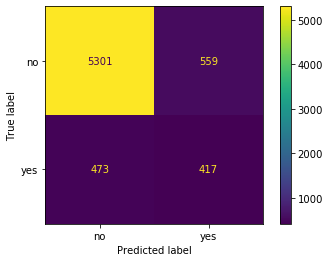

In [26]:
#plot the matrix
plot_confusion_matrix(model, X_test, y_test) 

In [19]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          no       0.92      0.90      0.91      5860
         yes       0.43      0.47      0.45       890

    accuracy                           0.85      6750
   macro avg       0.67      0.69      0.68      6750
weighted avg       0.85      0.85      0.85      6750



In [20]:
predictions

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

### 7 Testing (In this case making submissions to Kaggle competitions) 

In [21]:
test = pd.read_csv("test.csv")

Apply the same preprocess steps as you applied in training data. For this purpose you can use Pipleline class of Scikit learn as it reduces the work.

In [22]:
#check the data types and notice that many of the data types should be categorical.
#converting job,martial education,contact,month,day,poutcome
for i in attribute_list:
    test[i] = test[i].astype('category')
# Assigning numerical values and storing in same column
for i in attribute_list:
    test[i] = test[i].cat.codes

In [23]:
#Make predictions using the features from the test data set
predictions = model.predict(test)

#Display our predictions - they are either no or yes for each training instance 
#depending on whether our algorithm believes the person subscribed or not
predictions

array(['no', 'no', 'no', ..., 'yes', 'no', 'no'], dtype=object)

In [24]:
#Create a  DataFrame with the passengers ids and our prediction regarding whether they subscribed or not
submission = pd.DataFrame({'RecordID':test['RecordID'],'subscribe':predictions})

#Visualize the first 5 rows
submission.head()

,RecordID,subscribe
0,14664,no
1,25250,no
2,4070,no
3,19446,no
4,5111,no


In [25]:
#Convert DataFrame to a csv file that can be uploaded
#This is saved in the same directory as your notebook
filename = 'Bank Direct Marketing Predictions 1.csv'

submission.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: Bank Direct Marketing Predictions 1.csv


# END